In [0]:
import numpy as np
import imageio
from PIL import Image
import matplotlib.pyplot as plt


import math
from math import fabs

import scipy.ndimage
from scipy import misc

In [0]:
ilosc_katow = 400 #kolumny
ilosc_emiterow = 200 #wiersze
l = 350 #odleglosc od emitera nr 1 do emitera nr ilosc_emiterow

In [0]:
image = imageio.imread('/content/drive/My Drive/Colab Notebooks/Zdjecia/Kolo.jpg')

In [4]:
n_x = len(image)
n_y = len(image[0])

n_x, n_y

(400, 400)

In [0]:
def zapalPiksel(x,y, kolor="czarny"):
    if kolor=="czarny":
        wartosc = 255
    elif kolor=="bialy":
        wartosc=0
        
    #image_m[x][y] = wartosc
    image[x][y] = [wartosc, wartosc, wartosc]

In [0]:
def zczytajPiksel(nr_emitera, nr_kata, x, y):
    try:
        sinog[nr_emitera][nr_kata] += image[x][y][0]
    except:
        pass

In [0]:
### Ogólny algorytm Bresenhama
###############
def algBresenhama(nr_emitera, nr_kata, x1,y1,x2,y2):
#K01: 	Jeżeli x1 ≤ x2, to kx ← 1, inaczej kx ← -1 	; określamy krok X od x1 do x2
    if(x1<=x2):
        kx = 1
    else:
        kx = -1
#K02: 	Jeżeli y1 ≤ y2, to ky ← 1, inaczej ky ← -1 	; określamy krok Y od y1 do y2
    if(y1<=y2):
        ky = 1
    else:
        ky = -1
#K03: 	dx ← |x2 - x1| 	; odległość pomiędzy x1 i x2
    dx = math.fabs(x2 - x1)
#K04: 	dy ← |y2 - y1| 	; odległość pomiędzy y1 i y2
    dy = math.fabs(y2 - y1)
#K05: 	Zapal piksel x1,y1 	; pierwszy piksel odcinka
    #zapalPiksel(x1, y1)
#K06: 	Jeżeli dx < dy, idź do kroku K16 	; dla kątów > 45° wykonujemy wersję algorytmu z przestawionymi współrzędnymi
    if(dx < dy):
        #K16: 	e ← dy / 2 	; wersja algorytmu Bresenhama ze zamienionymi współrzędnymi x i y
        e = dy/2
        for i in range(int(dy)):
#K17: 	Powtarzaj dy razy kroki K18...K23 
#K18: 	    y1 ← y1 + ky
            y1 = y1 + ky
#K19: 	    e ← e - dx 
            e = e - dx
#K20: 	    Jeżeli e ≥ 0, idź do kroku K23 	 
            if(e>=0):
                try:
                    l_op_sinog[nr_emitera][nr_kata] += 1
                    zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    #zapalPiksel(x1, y1)
                except:
                    pass
                #zapalPiksel(x1, y1)
            else:
#K21: 	    x1 ← x1 + kx 	 
                x1 = x1 + kx
#K22: 	    e ← e + dy 	 
                e = e + dy
#K23: 	    Zapal piksel x1,y1 	 
                try:
                    l_op_sinog[nr_emitera][nr_kata] += 1
                    zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    #zapalPiksel(x1, y1)
                except:
                    pass
                #zapalPiksel(x1, y2)
    else:
#K07: 	e ← dx / 2 	; obliczamy wartość początkową wyrażenia błędu
        e = (dx/2)
#K08: 	Powtarzaj dx razy kroki K09...K14 	; rysujemy pozostałe piksele w pętli
        for i in range(int(dx)):
#K09: 	    x1 ← x1 + kx 	; przesuwamy się w odpowiednią stronę w kierunku szybkim
            x1 = x1 + kx
#K10: 	    e ← e - dy 	; obliczamy wyrażenie błędu
            e = e - dy
#K11: 	    Jeżeli e ≥ 0, idź do kroku K14 	; jeśli wyrażenie błędu jest nieujemne, pomijamy ruch w kierunku wolnym
            if(e>0):
                try:
                    l_op_sinog[nr_emitera][nr_kata] += 1
                    zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    #zapalPiksel(x1, y1)
                except:
                    pass
                #zapalPiksel(x1, y1)
            else:
#K12: 	    y1 ← y1 + ky 	; przesuwamy się w odpowiednią stronę w kierunku wolnym
                y1 = y1 + ky
#K13: 	    e ← e + dx 	; obliczamy nowe wyrażenie błędu
                e = e + dx
#K14: 	    Zapal piksel x1.y1 	; kolejny piksel odcinka
                try:
                    l_op_sinog[nr_emitera][nr_kata] += 1
                    zczytajPiksel(nr_emitera, nr_kata, x1,y1)
                    #zapalPiksel(x1, y1)
                except:
                    pass
                #zapalPiksel(x1, y1)

In [0]:
# sinogram_array = np.asarray(sinogram)
def arrayToImage(arr, form='L'):
    img = Image.fromarray(arr, form)
    img.save('/content/drive/My Drive/Colab Notebooks/Zdjecia/my.png')
    img.show()

In [0]:
# suma pikseli dla kazdego [emiter][kat]
sinog = [ [ 0 for y in range( ilosc_katow ) ] for x in range( ilosc_emiterow ) ]
# ilosc skladnikow odpowiadajaca kazdej komorce z tablicy sinog
l_op_sinog = [ [ 0 for y in range( ilosc_katow ) ] for x in range( ilosc_emiterow ) ]
# wartosc srednia dla kazdego [emiter][kat] -> sinog/l_op_sinog
sinogram = [ [ 0 for y in range( ilosc_katow ) ] for x in range( ilosc_emiterow ) ]

In [0]:
# polozenie emiterow odbiorczych

x_em = [ None for x in range(ilosc_emiterow + 1)]
y_em = [ None for y in range(ilosc_emiterow + 1)]

def ustaw_polozenie_emiterow_odb(bok):
    odstep = int(n_y/(ilosc_emiterow-1))
    dod = 0
    if bok==0:
        for i in range(1, ilosc_emiterow+1):
            x_em[i] = n_y - 1
            y_em[i] = 0 + dod
            dod += odstep
    elif bok==1:
        for i in range(1, ilosc_emiterow+1):
            x_em[i] = 0 + dod
            y_em[i] = 0
            dod += odstep
    elif bok==2:
        for i in range(1, ilosc_emiterow+1):
            x_em[i] = 0 + dod
            y_em[i] = n_x - 1
            dod += odstep
    elif bok==3:
          for i in range(1, ilosc_emiterow+1):
            x_em[i] = 0
            y_em[i] = 0 + dod
            dod += odstep

In [0]:
def ustaw_emiter_glowny(bok, przesuniecie=0):
#położenie początkowe emitera głównego
    if bok==0:
        y_em[0] = przesuniecie
        x_em[0] = 0
        
    elif bok==1:
        y_em[0] = n_x -1
        x_em[0] = przesuniecie
        
    elif bok==2:
        y_em[0] = 0
        x_em[0] = przesuniecie
        
    elif bok==3:
        y_em[0] = przesuniecie
        x_em[0] = n_y-1

In [0]:
def norma_res_to_sinogram():
    for k in range(ilosc_katow):
        for e in range(ilosc_emiterow):
            try:
                val = int(round(sinog[e][k]/l_op_sinog[e][k]))
            except:
                val = 0
            sinogram[e][k] = [val, val, val]

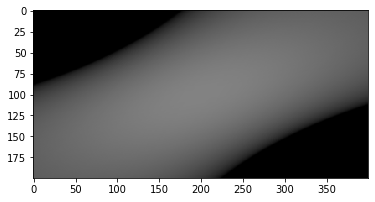

In [13]:
for bok in range(4):
    ustaw_polozenie_emiterow_odb(bok) # 0 - dół; 1 - lewa; 2 - prawa ; 3 - góra
    ods = 0
    przes = int(n_y/ilosc_katow)
    for i in range(ilosc_katow):
        ustaw_emiter_glowny(bok, ods) # 0 - góra; 1 - prawa ; 2 - lewa ; 3 - dol
        for em in range(ilosc_emiterow):
            algBresenhama(em, i, x_em[0], y_em[0], x_em[em+1], y_em[em+1])
        ods += przes
norma_res_to_sinogram()
#image_array = np.asarray(image)
#plt.imshow(image_array)


sinogram_array = np.asarray(sinogram)
plt.imshow(sinogram_array)
#arrayToImage(sinogram_array, form="L")

In [28]:
sinogram_array = np.asarray(sinogram)
sinogram_array.shape
sinogram_array

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [ 55,  55,  55],
        [ 83,  83,  83],
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [ 71,  71,  71],
        [ 91,  91,  91],
        [100, 100, 100],
        [102, 102, 102],
        [ 99,  99,  99]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [ 44,  44,  44],
        [ 84,  84,  84],
        [100, 100, 100],
        [105, 105, 105],
        [106, 106, 106],
        [102, 102, 102]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [ 68,  68,  68],
        [ 94,  94,  94],
        [107, 107, 107],
        [111, 111, 111],
        [109, 109, 109],
        [104, 104, 